# Importing Libraries


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
import alpaca_trade_api as tradeapi
from alpaca_trade_api import TimeFrame, TimeFrameUnit

# Importing Data and Visualization

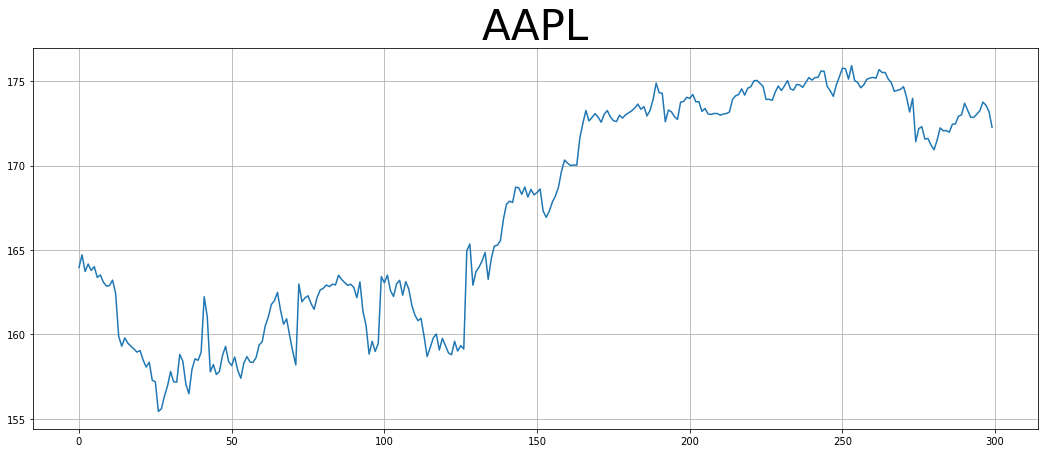

In [79]:
SEC_KEY = 'oR10Q75WdU32qnCjB6YrAWXZsb9K4I7bytCjVWwO'
PUB_KEY ='PKOLT5ME37ZTLIKDHQTK'
BASE_URL ='https://paper-api.alpaca.markets'
symb = "AAPL"
api = tradeapi.REST(key_id= PUB_KEY, secret_key=SEC_KEY, base_url=BASE_URL) # For real trading, don't enter a base_url
df = api.get_barset(symb, TimeFrame(15, TimeFrameUnit.Minute), limit=300).df  # Get one bar object for each of the past 5 minutes
df=df[symb]
df['Close']=df['close']
df['High']=df['high']
df['Low']=df['low']
df['Open']=df['open']
df['Volume']=df['volume']
plt.figure(figsize=(18,7))
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.plot(df['Close'] )
plt.title(symb,size=42)
plt.grid()
plt.show()

# Stocakastic_Indicator 

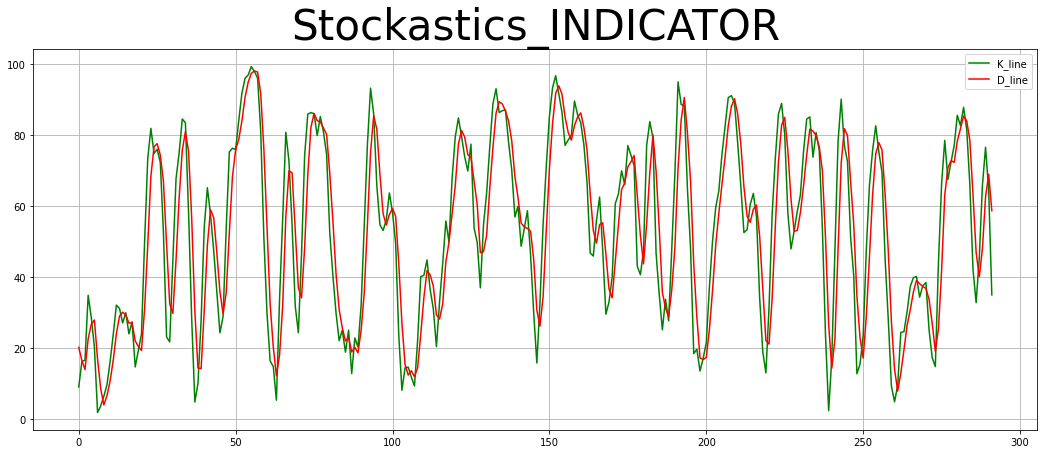

In [80]:
df['K_line'], df['D_line'] = ta.STOCH(df['High'],df['Low'],df['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.figure(figsize=(18,7))
plt.plot(df['K_line'],color='g',label='K_line')
plt.plot(df['D_line'],color='r',label='D_line')

plt.legend()
plt.title('Stockastics_INDICATOR',size=42)
plt.grid()
plt.show()

# Empty Arrays

In [81]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

# Decision Making

Profit = 12
Stop_loss = 3


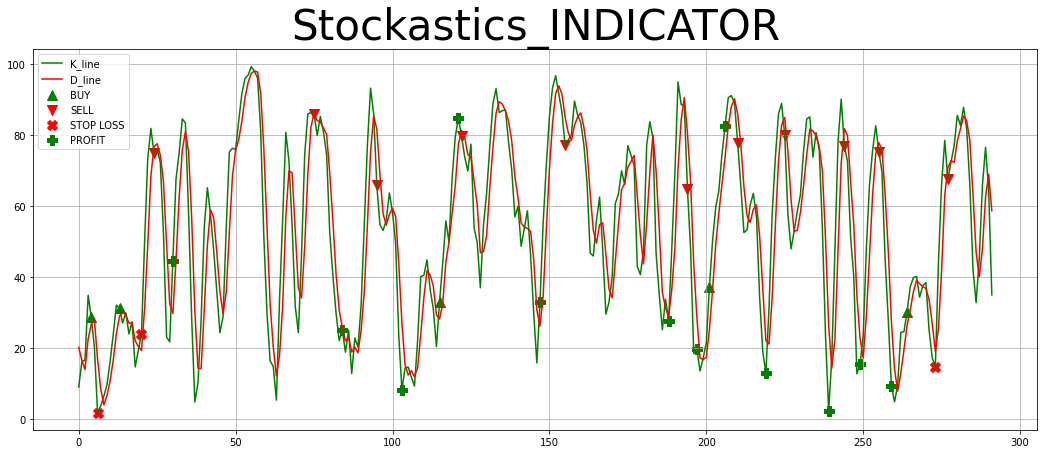

In [82]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['K_line'][i]>df['D_line'][i] and df['K_line'][i]<=40 and df['D_line'][i]<=40 and df['K_line'][i]>25 and df['D_line'][i]>25 and position_Buy!="Buy" and position_Sell!="Sell" :
        buy.append(df['K_line'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['K_line'][i]<df['D_line'][i] and df['K_line'][i]>=60 and df['D_line'][i]>=60 and df['K_line'][i]<90 and df['D_line'][i]<90 and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['K_line'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" :
        if df['D_line'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['K_line'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['D_line'][i]<=20 :
            Stop_loss.append(df['K_line'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell":
        if df['D_line'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['K_line'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['D_line'][i]>=90:
            Stop_loss.append(df['K_line'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))
####################################################Visualization###################################
plt.plot(df['K_line'],color='g',label='K_line')
plt.plot(df['D_line'],color='r',label='D_line')
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100,label='SELL')
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100,label='STOP LOSS')
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100,label='PROFIT')
plt.legend()
plt.title('Stockastics_INDICATOR',size=42)
plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())


In [83]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
position_Buy=None
position_Sell=None

Profit = 12
Stop_loss = 3
PROFITIBLITY 80.0


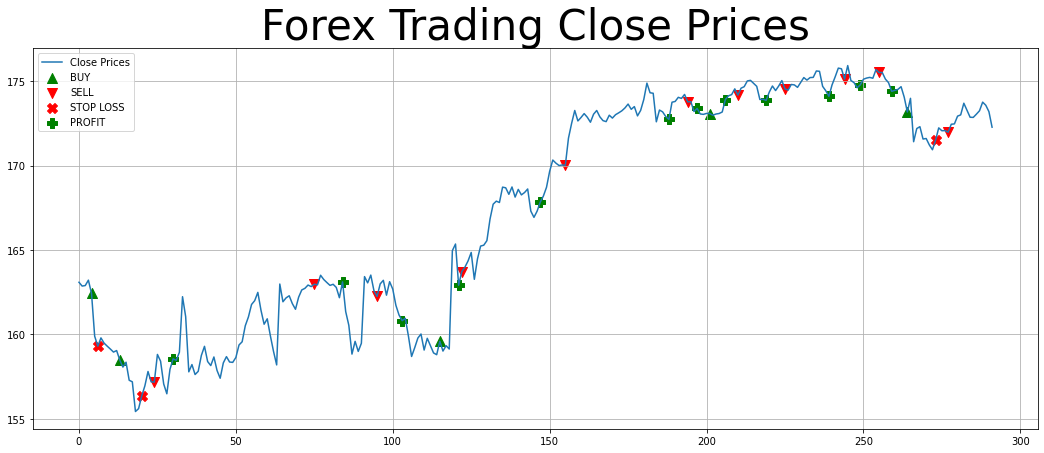

In [84]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['K_line'][i]>df['D_line'][i] and df['K_line'][i]<=40 and df['D_line'][i]<=40 and df['K_line'][i]>25 and df['D_line'][i]>25 and position_Buy!="Buy" and position_Sell!="Sell" :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['K_line'][i]<df['D_line'][i] and df['K_line'][i]>=60 and df['D_line'][i]>=60 and df['K_line'][i]<90 and df['D_line'][i]<90 and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_stoc#######################################################
    elif position_Buy=="Buy" :
        if df['D_line'][i]>=70 :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['D_line'][i]<=20 :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_stock#######################################################
    elif position_Sell=="Sell":
        if df['D_line'][i]<=30:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['D_line'][i]>=90:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
###############################################Visualization########################################
plt.figure(figsize=(18,7))
plt.plot(df['Close'],label='Close Prices')
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100,label='SELL')
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100,label='STOP LOSS')
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100,label='PROFIT')
plt.legend()
plt.title('Forex Trading Close Prices',size=42)
plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")